In [32]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import seaborn as sns
import numpy as np

In [115]:
# data feature
df_li = []
for c in ['BTC']:
    data = pd.read_parquet(f'../data/{c}USDT/').reset_index()
    data['COIN'] = c
    df_li.append(data)
df = pd.concat(df_li)

In [116]:
df.OPEN_TIME.dtype

dtype('int64')

In [117]:
df['DATETIME'] = df.OPEN_TIME.apply(lambda x: datetime.fromtimestamp(x/1000))
df

,OPEN_TIME,OPEN,HIGH,LOW,CLOSE,VOLUME,QUOTE_ASSET_VOLUME,NUMBER_OF_TRADES,TAKER_BUY_BASE_ASSET_VOLUME,TAKER_BUY_QUOTE_ASSET_VOLUME,YEAR_AND_MONTH,COIN,DATETIME
0,1502942400000,4261.48,4280.56,4261.48,4261.48,2.189061,9.333621e+03,9,0.489061,2.089105e+03,201708,BTC,2017-08-17 11:00:00
1,1502942700000,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000e+00,0,0.000000,0.000000e+00,201708,BTC,2017-08-17 11:05:00
2,1502943000000,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000e+00,0,0.000000,0.000000e+00,201708,BTC,2017-08-17 11:10:00
3,1502943300000,4261.48,4264.88,4261.48,4261.48,0.484666,2.065448e+03,9,0.085455,3.642181e+02,201708,BTC,2017-08-17 11:15:00
4,1502943600000,4264.88,4266.29,4264.88,4266.29,2.328570,9.931161e+03,11,1.546491,6.595688e+03,201708,BTC,2017-08-17 11:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
615729,1688175600000,30456.35,30467.01,30440.00,30453.91,59.756630,1.819998e+06,1988,20.443870,6.226559e+05,202307,BTC,2023-07-01 08:40:00
615730,1688175900000,30453.91,30457.95,30432.42,30450.00,73.974380,2.252346e+06,2351,33.372470,1.016073e+06,202307,BTC,2023-07-01 08:45:00
615731,1688176200000,30449.99,30454.00,30438.93,30439.64,52.670400,1.603592e+06,1798,27.467700,8.363019e+05,202307,BTC,2023-07-01 08:50:00
615732,1688176500000,30439.64,30447.78,30434.22,30447.78,52.622910,1.601900e+06,1663,23.235780,7.073096e+05,202307,BTC,2023-07-01 08:55:00


In [119]:
df_li = []
for c in ['BTC']:
    label = pd.read_parquet(f'../data/LABEL_{c}USDT/').reset_index()
    df_li.append(label)
label = pd.concat(df_li)

In [120]:
label['DATETIME'] = label.OPEN_TIME.apply(lambda x: datetime.fromtimestamp(x/1000))
label

,OPEN_TIME,SYMBOL,LABEL,DATETIME
0,1.505556e+12,BTCUSDT,0.393885,2017-09-16 17:00:00
1,1.505560e+12,BTCUSDT,0.390215,2017-09-16 18:00:00
2,1.505563e+12,BTCUSDT,0.360434,2017-09-16 19:00:00
3,1.505567e+12,BTCUSDT,0.398650,2017-09-16 20:00:00
4,1.505570e+12,BTCUSDT,0.451718,2017-09-16 21:00:00
...,...,...,...,...
47672,1.677611e+12,BTCUSDT,0.448246,2023-03-01 02:00:00
47673,1.677614e+12,BTCUSDT,0.470401,2023-03-01 03:00:00
47674,1.677618e+12,BTCUSDT,0.468764,2023-03-01 04:00:00
47675,1.677622e+12,BTCUSDT,0.474988,2023-03-01 05:00:00


- chỉ số cùng kì 1 ngày trước, 1 tuần trước, 1 tháng trước (áp dụng cho model k phải time series)
- min, max, mean, median, variance trong vòng 1h, 2h, 3h, 4h, 5h
- min, max, mean, median, variance trong vòng 1 ngày, 1 tuần, 1 tháng trước

In [121]:
label['REF_TIME'] = label.DATETIME.apply(lambda x: x - timedelta(hours=2))

In [122]:
df['REF_TIME'] = df.DATETIME.apply(lambda x: datetime.strptime(datetime.strftime(x, '%Y-%m-%d %H:00:00'), '%Y-%m-%d %H:%M:%S'))

In [142]:
(list(df.REF_TIME.unique())[0])

numpy.datetime64('2017-08-17T11:00:00.000000000')

In [137]:
datetime(2023, 6, 1) - timedelta(hours=1)

datetime.datetime(2023, 5, 31, 23, 0)

In [132]:
type(timedelta(hours=1))

datetime.timedelta

In [157]:
def get_features(df_):
    _df = df_.copy()
    result_li = []
    for t in list(_df.REF_TIME.unique()):
        t = pd.to_datetime(t)
        df_li=[]
        for p in range(1, 6):
            start_time = t - timedelta(hours=p)
            feat = _df[(_df['DATETIME'] > start_time) & (_df['DATETIME'] <= t)]
            feat['REF_TIME'] = t
            feat = (
                feat[['REF_TIME', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME', 'QUOTE_ASSET_VOLUME', 
                      'NUMBER_OF_TRADES', 'TAKER_BUY_BASE_ASSET_VOLUME', 'TAKER_BUY_QUOTE_ASSET_VOLUME']]
                .groupby('REF_TIME')
                .agg({'min', 'max', 'median', 'mean', 'var'})
                .droplevel(axis = 1, level=0)
                .reset_index()
            )
            feat.drop(columns='REF_TIME', inplace=True)
            feat.columns = [f'MIN_OPEN_{p}H', f'MED_OPEN_{p}H', f'MAX_OPEN_{p}H', f'MEAN_OPEN_{p}H', f'VAR_OPEN_{p}H', 
                            f'MIN_HIGH_{p}H', f'MED_HIGH_{p}H', f'MAX_HIGH_{p}H', f'MEAN_HIGH_{p}H', f'VAR_HIGH_{p}H',
                            f'MIN_LOW_{p}H', f'MED_LOW_{p}H', f'MAX_LOW_{p}H', f'MEAN_LOW_{p}H', f'VAR_LOW_{p}H',
                            f'MIN_CLOSE_{p}H', f'MED_CLOSE_{p}H', f'MAX_CLOSE_{p}H', f'MEAN_CLOSE_{p}H', f'VAR_CLOSE_1{p}H',
                            f'MIN_VOLUME_{p}H', f'MED_VOLUME_{p}H', f'MAX_VOLUME_{p}H', f'MEAN_VOLUME_{p}H', f'VAR_VOLUME_{p}H',
                            f'MIN_QUOTE_ASSET_VOLUME_{p}H', f'MED_QUOTE_ASSET_VOLUME_{p}H', f'MAX_QUOTE_ASSET_VOLUME_{p}H', f'MEAN_QUOTE_ASSET_VOLUME_{p}H', f'VAR_QUOTE_ASSET_VOLUME_{p}H',
                            f'MIN_NUMBER_OF_TRADES_{p}H', f'MED_NUMBER_OF_TRADES_{p}H', f'MAX_NUMBER_OF_TRADES_{p}H', f'MEAN_NUMBER_OF_TRADES_{p}H', f'VAR_NUMBER_OF_TRADES_{p}H',
                            f'MIN_TAKER_BUY_BASE_ASSET_VOLUME_{p}H', f'MED_TAKER_BUY_BASE_ASSET_VOLUME_{p}H', f'MAX_TAKER_BUY_BASE_ASSET_VOLUME_{p}H', f'MEAN_TAKER_BUY_BASE_ASSET_VOLUME_{p}H', f'VAR_TAKER_BUY_BASE_ASSET_VOLUME_{p}H',
                            f'MIN_TAKER_BUY_QUOTE_ASSET_VOLUME_{p}H', f'MED_TAKER_BUY_QUOTE_ASSET_VOLUME_{p}H', f'MAX_TAKER_BUY_QUOTE_ASSET_VOLUME_{p}H', f'MEAN_TAKER_BUY_QUOTE_ASSET_VOLUME_{p}H', f'VAR_TAKER_BUY_QUOTE_ASSET_VOLUME_{p}H']
            df_li.append(feat)
        result=pd.concat(df_li, axis=1)
        result['REF_TIME'] = t
        result_li.append(result)
    result = pd.concat(result_li)
    return result

In [158]:
df.REF_TIME.nunique()

51327

In [ ]:
features = get_features(df)

C:\Users\LAP13398-local\anaconda3\envs\thuantran\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
features.to_csv('../data/BTC_features.csv', index=False)

<AxesSubplot:>

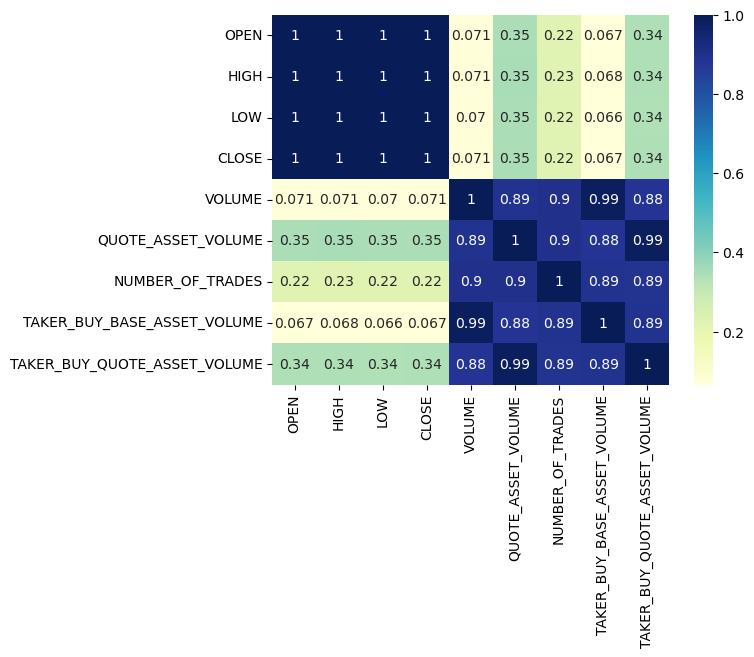

In [36]:
sns.heatmap(df[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME',
    'QUOTE_ASSET_VOLUME', 'NUMBER_OF_TRADES', 'TAKER_BUY_BASE_ASSET_VOLUME',
    'TAKER_BUY_QUOTE_ASSET_VOLUME']].corr(), cmap="YlGnBu", annot=True)

In [68]:
feature_1h.columns = ['REF_TIME', 'MIN_OPEN_1H', 'MED_OPEN_1H', 'MAX_OPEN_1H', 'MEAN_OPEN_1H', 'VAR_OPEN_1H', 
                      'MIN_HIGH_1H', 'MED_HIGH_1H', 'MAX_HIGH_1H', 'MEAN_HIGH_1H', 'VAR_HIGH_1H',
                      'MIN_LOW_1H', 'MED_LOW_1H', 'MAX_LOW_1H', 'MEAN_LOW_1H', 'VAR_LOW_1H',
                      'MIN_CLOSE_1H', 'MED_CLOSE_1H', 'MAX_CLOSE_1H', 'MEAN_CLOSE_1H', 'VAR_CLOSE_1H',
                      'MIN_VOLUME_1H', 'MED_VOLUME_1H', 'MAX_VOLUME_1H', 'MEAN_VOLUME_1H', 'VAR_VOLUME_1H',
                      'MIN_QUOTE_ASSET_VOLUME_1H', 'MED_QUOTE_ASSET_VOLUME_1H', 'MAX_QUOTE_ASSET_VOLUME_1H', 'MEAN_QUOTE_ASSET_VOLUME_1H', 'VAR_QUOTE_ASSET_VOLUME_1H',
                      'MIN_NUMBER_OF_TRADES_1H', 'MED_NUMBER_OF_TRADES_1H', 'MAX_NUMBER_OF_TRADES_1H', 'MEAN_NUMBER_OF_TRADES_1H', 'VAR_NUMBER_OF_TRADES_1H',
                      'MIN_TAKER_BUY_BASE_ASSET_VOLUME_1H', 'MED_TAKER_BUY_BASE_ASSET_VOLUME_1H', 'MAX_TAKER_BUY_BASE_ASSET_VOLUME_1H', 'MEAN_TAKER_BUY_BASE_ASSET_VOLUME_1H', 'VAR_TAKER_BUY_BASE_ASSET_VOLUME_1H',
                      'MIN_TAKER_BUY_QUOTE_ASSET_VOLUME_1H', 'MED_TAKER_BUY_QUOTE_ASSET_VOLUME_1H', 'MAX_TAKER_BUY_QUOTE_ASSET_VOLUME_1H', 'MEAN_TAKER_BUY_QUOTE_ASSET_VOLUME_1H', 'VAR_TAKER_BUY_QUOTE_ASSET_VOLUME_1H']

In [69]:
feature_1h

,REF_TIME,MIN_OPEN_1H,MED_OPEN_1H,MAX_OPEN_1H,MEAN_OPEN_1H,VAR_OPEN_1H,MIN_HIGH_1H,MED_HIGH_1H,MAX_HIGH_1H,MEAN_HIGH_1H,...,MIN_TAKER_BUY_BASE_ASSET_VOLUME_1H,MED_TAKER_BUY_BASE_ASSET_VOLUME_1H,MAX_TAKER_BUY_BASE_ASSET_VOLUME_1H,MEAN_TAKER_BUY_BASE_ASSET_VOLUME_1H,VAR_TAKER_BUY_BASE_ASSET_VOLUME_1H,MIN_TAKER_BUY_QUOTE_ASSET_VOLUME_1H,MED_TAKER_BUY_QUOTE_ASSET_VOLUME_1H,MAX_TAKER_BUY_QUOTE_ASSET_VOLUME_1H,MEAN_TAKER_BUY_QUOTE_ASSET_VOLUME_1H,VAR_TAKER_BUY_QUOTE_ASSET_VOLUME_1H
0,2017-08-17 11,4261.48,4273.145,4310.07,4280.200833,379.321845,4261.48,4288.595,4313.62,4287.457500,...,0.00000,1.680829,7.873691,2.930042,8.608365,0.000000,7.169858e+03,3.365375e+04,1.257937e+04,1.586459e+08
1,2017-08-17 12,4291.37,4317.270,4328.69,4313.718333,112.981233,4291.37,4320.000,4328.69,4315.438333,...,0.00000,0.684581,7.049489,1.787339,5.714431,0.000000,2.955293e+03,3.045059e+04,7.717357e+03,1.065363e+08
2,2017-08-17 13,4309.37,4329.325,4345.45,4327.332500,123.416620,4311.58,4330.060,4345.45,4330.835000,...,0.00000,0.007874,2.236628,0.400238,0.682716,0.000000,3.409832e+01,9.669276e+03,1.732943e+03,1.279963e+07
3,2017-08-17 14,4287.41,4311.000,4324.35,4306.759167,191.321190,4287.41,4316.620,4349.99,4311.041667,...,0.00000,0.000000,2.201811,0.216858,0.403891,0.000000,0.000000e+00,9.560337e+03,9.409456e+02,7.613541e+06
4,2017-08-17 15,4333.32,4360.700,4377.85,4359.789167,94.029281,4360.00,4360.700,4377.85,4363.500000,...,0.00000,0.017267,0.518075,0.067888,0.021170,0.000000,7.529615e+01,2.258071e+03,2.960622e+02,4.022126e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51322,2023-07-01 05,30468.63,30497.120,30518.00,30497.154167,288.744736,30476.68,30513.180,30529.99,30506.899167,...,6.48915,27.280535,80.383910,31.861632,471.868040,197849.997276,8.324087e+05,2.451108e+06,9.716283e+05,4.388388e+11
51323,2023-07-01 06,30461.17,30481.985,30530.00,30487.666667,475.689424,30465.99,30505.640,30544.44,30502.004167,...,16.47637,26.881200,65.645410,32.608223,307.693348,502119.236084,8.194060e+05,2.002921e+06,9.943935e+05,2.867029e+11
51324,2023-07-01 07,30447.71,30492.365,30523.57,30493.265000,478.568336,30484.09,30513.000,30534.74,30509.643333,...,24.92459,48.028640,73.459530,48.618848,158.494997,759496.807678,1.464361e+06,2.242224e+06,1.482465e+06,1.477379e+11
51325,2023-07-01 08,30407.65,30448.330,30476.85,30444.482500,412.947839,30437.48,30456.970,30484.31,30459.146667,...,20.44387,44.853795,92.717290,45.675170,488.224303,622655.936438,1.364999e+06,2.819748e+06,1.390263e+06,4.515461e+11
